# Data Project 2: Consolidating Data & Feature Engineering


Project: ML-Ready Dataset Preparation for Environmental Impacts Prediction
CMPT 2400 - Data Preparations and Analytics

## Team Members:
- Alma Soria
- Angela Lekivetz
- Crystal Blackburn
- Michaela Goud

# 1. Introduction  - *Author: Crystal B.*



This project focuses on analyzing the National Pollutant Release Inventory (NPRI) dataset to predict future trends in pollutant releases by industry. Specifically, the goal is to determine which industry is expected to experience the highest growth in releases and which one is projected to see the largest decline over the next five years. This analysis will provide crucial insights for environmental monitoring, policy development, and industrial sustainability efforts.

To achieve this, the project involves:

1. **Data Transformation:**  (PROJECT 1)

   Restructuring the NPRI data into a time-series-friendly format. This includes organizing the data chronologically, addressing data quality issues, and ensuring that the dataset is prepared for subsequent analysis.

2. **Data Consolidation:**  
   Aligning and merging multiple datasets if applicable. This step ensures that all data sources are consistent in scale and structure, allowing for an integrated analysis of the NPRI dataset along with any additional relevant datasets.

3. **Feature Engineering:**  
   - **Feature Encoding:** Converting categorical data into numeric formats (e.g., using one-hot encoding) to ensure the data is machine-learning ready.  
   - **Normalization:** Standardizing features to bring them onto a common scale.  
   - **Feature Creation:** Developing new features through basic engineering techniques informed by domain research to enhance the model’s predictive capability.  
   - **Feature Selection:** Identifying and selecting the most relevant features based on their predictive power and relevance, thereby improving model performance and reducing redundancy.

4. **Documentation and Justification:**  
   All processes, decisions, and methodologies will be thoroughly documented in a well-organized Jupyter notebook. This includes detailed explanations, visualizations, and justifications for every step—from data consolidation through feature engineering and selection.

The NPRI is a critical Canadian resource for tracking industrial and commercial pollutant releases. By leveraging this data, the project not only aims to forecast environmental impacts but also to promote transparency and public awareness regarding industrial emissions.

# **Analyzing National Pollutant Release Inventory (NPRI) Data for Industry Trends**

## Chosen Problem

**Problem #5:**  
Based on NPRI data, which industry is predicted to have the highest growth of releases in 5 years? Which will have the largest decline?

Based on the problem definition, our goal is to determine:  

- **Which industry is predicted to experience the highest growth in pollutant releases over the next five years?**  
- **Which industry is predicted to experience the largest decline in pollutant releases over the next five years?**

**Justification**: This problem definition is well-formulated because:
- It addresses a real-world environmental concern with practical implications
- It has clear, measurable objectives (identifying industries with highest/lowest growth)
- It leverages historical data to make future predictions, a classic ML use case
- It can be approached using supervised learning techniques on time-series data

To achieve this, the project involves the following steps:  

### **Data Transformation (PROJECT 1)**
- Restructuring the NPRI data into a **time-series-friendly format**.  
- Organizing the data **chronologically** and addressing **data quality issues**.  
- Ensuring that the dataset is well-prepared for **subsequent analysis**.  

### **Data Consolidation**
- Aligning and merging multiple datasets (if applicable).  
- Ensuring that all data sources are **consistent in scale and structure**, allowing for an integrated analysis of the NPRI dataset alongside any additional relevant datasets.  

### **Feature Engineering**
- **Feature Engineering:** Developing new features using domain-informed techniques to enhance predictive performance.  
- **Feature Encoding:** Converting categorical data (both original and engineered) into numeric formats suitable for machine learning.  
- **Normalization:** Standardizing numerical features to ensure consistent scaling across variables.  
- **Feature Selection:** Identifying the most **relevant** features to improve model performance and reduce redundancy.  

### **Documentation and Justification**
All processes, decisions, and methodologies will be **thoroughly documented** in a well-organized **Jupyter notebook**.




# 2. Setup & Data Preparation

## Importing Necessary Libraries

These settings improve the readability of dataframe output during exploratory data analysis, ensuring all columns are visible without truncation. This is crucial when working with complex datasets containing many features.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import gdown #To download files, in this case from google drive

# Set pandas display options for better visibility, global
pd.set_option('display.max_columns', None)  # Ensures that when you print a DataFrame, all columns are shown (even if there are many).
pd.set_option('display.expand_frame_repr', False) # Prevents pandas from breaking the DataFrame output across multiple lines.

## Previous Data Cleaning & EDA

The data cleaning and exploratory data analysis (EDA) for the ["NPRI_2000-2022"](https://docs.google.com/spreadsheets/d/1M2qZLLN5NWXvpLgnvNa8iqkakK-IAWVW/edit?usp=sharing&rtpof=true&sd=true) dataset was completed as part of the CMPT2400 Project 1. For efficiency, we are using the saved clean CSV file that resulted from Project 1 named "df_release_p2.csv". The Previous Data Cleaninig & EDA notebook Project 1 can be accessed via the following link:

[CMPT2400 Link Notebook:  Transition_Project1_to_Project2_CMPT2400.ipynb](https://colab.research.google.com/drive/1yiK1jUi5qRGxMd7n54rlChbi2K6W_BJh?usp=sharing)


## Load the NPRI dataset
[Clean dataset named "df_release_p2.csv"](https://drive.google.com/file/d/1VNuVnJ6Yuxl50HqPA9EwguzLlen2QC6E/view?usp=sharing)

In [ ]:
# Google Drive file ID (Extracted from google drive sharable link)
file_id_release_p2 = "1VNuVnJ6Yuxl50HqPA9EwguzLlen2QC6E"
file_name_release_p2 = "df_release_p2.csv"

# Download the file using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id_release_p2}", file_name_release_p2, quiet=False)

# Read the CSV file
df = pd.read_csv(file_name_release_p2)

Downloading...
From (original): https://drive.google.com/uc?id=1VNuVnJ6Yuxl50HqPA9EwguzLlen2QC6E
From (redirected): https://drive.google.com/uc?id=1VNuVnJ6Yuxl50HqPA9EwguzLlen2QC6E&confirm=t&uuid=bbce9fd8-1fda-486c-9016-4aa2895eb750
To: /content/df_release_p2.csv
100%|██████████| 175M/175M [00:02<00:00, 58.3MB/s]


In [ ]:
# Copy df as df_release to use as our main dataset for the project
df_release = df.copy()

## Justification for Proceeding with Zero-Imputed Dataset

### Rationale for Imputing Zeros in Release Columns

- **Domain-Specific Context:**  
  Missing values in environmental reporting usually indicate no significant pollutant release, rather than measurement errors. Thus, imputing zeros accurately reflects the reality of non-reported releases.

- **Temporal Consistency:**  
  Zero imputation preserves the dataset's temporal integrity, which is vital for analyzing trends and forecasting industry releases. Using alternatives like mean imputation could artificially increase values, especially for industries with historically low or zero releases.

- **Statistical Validity:**  
  The environmental release data naturally contains many zeros. Imputing zeros is consistent with this zero-inflated distribution, making it the most statistically appropriate method.

### Justification for Not Applying Additional Outlier Handling

- **Preservation of Legitimate Environmental Events:**  
  Values that might traditionally be considered outliers can represent valid environmental incidents, regulatory changes, or industry-specific events. Removing them could strip the dataset of critical insights.

- **Zero-Inflated Distribution Challenges:**  
  With a significant number of zeros present, standard outlier detection methods (like Z-score or IQR) could mistakenly flag legitimate non-zero values as outliers.

- **Research Objective Alignment:**  
  The goal is to predict industries with the highest growth or decline in releases. Retaining the full range of values, including extreme ones, provides important signals for future trends.

- **Time Series Integrity:**  
  Removing or transforming outliers in time series data may distort key temporal patterns. Maintaining authentic variance is more beneficial for forecasting long-term trends.

- **Alternative Feature Engineering Approach:**  
  Instead of outlier removal, feature engineering (e.g., percentage changes, rolling averages, and proportional metrics) will be used to capture both the presence of zeros and the pattern of higher releases, ensuring that the variability is appropriately addressed.


# 3. Data Alignment & Merging

## Copy and Save Clean Comments Dataframe

For our analysis, we only require the "Releases" columns. However, we noticed that a new dataset that includes the releases for 2023 is available in the [NPRI website](https://www.canada.ca/en/services/environment/pollution-waste-management/national-pollutant-release-inventory.html)

We will merge our principal dataset (df_release) with the additional 2023 dataset.

For efficiency, you can review the dataset cleaning process at this link:
[Dataset 2023 Releases Data Cleaning & EDA Process](https://colab.research.google.com/drive/1Co8YARCyClOz_kO7cvVl54DEMpiiErIx?usp=drive_link)

In [ ]:
# Google Drive file ID (Extracted from google drive sharable link)
file_id_clean_2023 = "1OSWtPGERwgPNNIM4aXixeLxvDz6NI26r"
file_name_clean_2023 = "df_clean_2023.csv"

# Download the file using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id_clean_2023}", file_name_clean_2023, quiet=False)

# Read the CSV file
df_clean_2023 = pd.read_csv(file_name_clean_2023)

Downloading...
From: https://drive.google.com/uc?id=1OSWtPGERwgPNNIM4aXixeLxvDz6NI26r
To: /content/df_clean_2023.csv
100%|██████████| 11.1M/11.1M [00:00<00:00, 60.9MB/s]


In [ ]:
# For ease and effciency in merging these datasets we will read them as
# df_1 (primary) and df_2 (additional 2023 data to be merged)
df_1 = pd.read_csv('df_release_p2.csv')
df_2 = pd.read_csv('df_clean_2023.csv')

## Data Profiling

### Profiling Main Dataset (df_release)

Understanding the dataset's characteristics (column names, data types, missing values) helps in making informed decisions about preprocessing.  

#### Attribute Analysis
1. **Column Overview & Data Types:** Shows the number of rows, columns, non-null counts, data types, and the shape of the dataframe.

In [ ]:
df_release.info()
# Display details of the additional dataset
print("== Additional Dataset Details ==")

# Display dataset shape using an f-string for clarity
print(f"\nDataset Shape: {df_release.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Reporting_Year                                737516 non-null  int64  
 1   NPRI_ID                                       737516 non-null  int64  
 2   Number of employees                           737516 non-null  float64
 3   Company_Name                                  737516 non-null  object 
 4   Facility_Name                                 736340 non-null  object 
 5   NAICS                                         737516 non-null  int64  
 6   NAICS_Title                                   737516 non-null  object 
 7   Province                                      737516 non-null  object 
 8   City                                          737516 non-null  object 
 9   Latitude                                      73

2. **Unique Values per Column:** Quickly reveals the cardinality of each column.


In [ ]:
df_release.nunique()

,0
Reporting_Year,23
NPRI_ID,21868
Number of employees,1883
Company_Name,8954
Facility_Name,31670
NAICS,403
NAICS_Title,424
Province,13
City,3066
Latitude,19318


3. **Missing Values:** Tells us how many null entries are in each column, helping us to stop any columns that may need additional analysis.

In [ ]:
df_release.isna().sum()

,0
Reporting_Year,0
NPRI_ID,0
Number of employees,0
Company_Name,0
Facility_Name,1176
NAICS,0
NAICS_Title,0
Province,0
City,0
Latitude,0


Even though we did not have missing values after our initial cleaninig, we will handle the missing values displayed above for Facility_Name and Estimation_Method_Code


In [ ]:
for col in ['Facility_Name', 'Estimation_Method_Code']:
    print(f'Missing value count in column {col} before imputation: {df_release[col].isna().sum()}')
    df_release[col] = df_release[col].fillna('Unknown')
    print(f'Missing value count in column {col} after imputation: {df_release[col].isna().sum()}\n')

Missing value count in column Facility_Name before imputation: 1176
Missing value count in column Facility_Name after imputation: 0

Missing value count in column Estimation_Method_Code before imputation: 2
Missing value count in column Estimation_Method_Code after imputation: 0



4. **Value Counts:** Display frequency counts for categorical columns.

In [ ]:
print("\n=== Categorical Column Frequency Counts ===")
categorical_columns = ['Company_Name', 'Facility_Name', 'NAICS', 'NAICS_Title',
             'CAS_Number', 'Province', 'Substance_Name',
             'City', 'NPRI_ID', 'Estimation_Method_Code']

for col in categorical_columns:
    print(f"\n--- Frequency for {col} ---")
    print(df_release[col].value_counts())


=== Categorical Column Frequency Counts ===

--- Frequency for Company_Name ---
Company_Name
canadian natural resources limited             31595
imperial oil                                   16648
husky oil operations limited                    7536
cenovus energy inc                              5995
crescent point energy corp                      5809
                                               ...  
solutions environnementales 360 quebec ltee        1
production paint stripping ltd                     1
shelburne ship repair limited                      1
bateaux princecraft inc                            1
tri city heat treat                                1
Name: count, Length: 8954, dtype: int64

--- Frequency for Facility_Name ---
Facility_Name
Unknown                        11406
sarnia refinery plant           2141
suncor energy inc oil sands     1745
edmonton terminal               1623
dofasco hamilton                1595
                               ...  
ribstone 0

#### Statistical Analysis

1. **Summary Statistics for Numeric Columns:** Provides count, mean, std, min, max, and quartile values for all numeric columns.

This snippet first computes descriptive statistics for all numerical columns, summarizing key metrics such as mean, standard deviation, minimum, and maximum values. It then iterates over a list of categorical columns, displaying the frequency counts of each unique value to give you insight into the distribution of categories within the dataset. Each step is clearly commented to help  understand the operations being performed, ensuring we can quickly assess data quality and identify any potential imbalances or anomalies.

In [ ]:
df_release.describe()

,Reporting_Year,NPRI_ID,Number of employees,NAICS,Latitude,Longitude,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
count,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000
mean,2012.267601,11248.268386,276.447889,289175.551820,49.636706,-97.336905,0.656370,0.208673,0.602870,0.001109,15.503517,0.314959,0.000025,0.058489,0.000102,0.278167,0.000014,0.001005,0.092328
std,6.400156,9352.868266,1362.175714,94788.542197,5.149746,20.181792,2.820939,1.948992,5.072929,0.023961,28.626812,1.742329,0.002997,1.328800,0.002832,1.969766,0.001716,0.033234,0.209952
min,2000.000000,1.000000,0.000000,111120.000000,0.000000,-140.883600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3775.000000,2.000000,211113.000000,45.429840,-114.750600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,7114.000000,40.000000,312140.000000,49.791100,-104.614410,0.000000,0.000000,0.000000,0.000000,0.345000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,18093.000000,216.000000,327120.000000,53.508500,-79.532000,0.000000,0.000000,0.000000,0.000000,15.594000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028160
max,2022.000000,306556.000000,211934.000000,913910.000000,82.498758,0.000000,15.896937,22.506500,58.085000,0.626375,89.996000,12.363062,0.451750,39.635025,0.094850,16.411527,0.249701,1.249143,0.983650


2. **Include All Columns (Numeric & Categorical):** Offers descriptive statistics for both numeric and categorical columns (top, freq, etc.).

In [ ]:
df.describe(include='all')

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,City,Latitude,Longitude,CAS_Number,Substance_Name,Units,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne),Estimation_Method_Code
count,737516.000000,737516.000000,737516.000000,737516,736340,737516.000000,737516,737516,737516,737516.000000,737516.000000,737516,737516,737516,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737516.000000,737514
unique,NaN,NaN,NaN,8954,31670,NaN,424,13,3066,NaN,NaN,257,256,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,canadian natural resources limited,Unknown,NaN,conventional oil and gas extraction,ab,calgary,NaN,NaN,NA - M10,pm2 5 - particulate matter 2 5 micrometers,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E2
freq,NaN,NaN,NaN,31595,10230,NaN,120204,248830,18887,NaN,NaN,88440,88440,732700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374255
mean,2012.267601,11248.268386,276.447889,NaN,NaN,289175.551820,NaN,NaN,NaN,49.636706,-97.336905,NaN,NaN,NaN,0.656370,0.208673,0.602870,0.001109,15.503517,0.314959,0.000025,0.058489,0.000102,0.278167,0.000014,0.001005,0.092328,NaN
std,6.400156,9352.868266,1362.175714,NaN,NaN,94788.542197,NaN,NaN,NaN,5.149746,20.181792,NaN,NaN,NaN,2.820939,1.948992,5.072929,0.023961,28.626812,1.742329,0.002997,1.328800,0.002832,1.969766,0.001716,0.033234,0.209952,NaN
min,2000.000000,1.000000,0.000000,NaN,NaN,111120.000000,NaN,NaN,NaN,0.000000,-140.883600,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2007.000000,3775.000000,2.000000,NaN,NaN,211113.000000,NaN,NaN,NaN,45.429840,-114.750600,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2012.000000,7114.000000,40.000000,NaN,NaN,312140.000000,NaN,NaN,NaN,49.791100,-104.614410,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.345000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2018.000000,18093.000000,216.000000,NaN,NaN,327120.000000,NaN,NaN,NaN,53.508500,-79.532000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,15.594000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028160,NaN


3. **Correlations:** Generates a correlation matrix for numeric columns, useful for identifying strong or weak relationships.

In [ ]:
corr_matrix = df_release.corr(numeric_only=True)
corr_matrix

,Reporting_Year,NPRI_ID,Number of employees,NAICS,Latitude,Longitude,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
Reporting_Year,1.000000,0.378644,-0.009823,-0.123593,0.162679,-0.154139,-0.006817,-0.008581,0.045002,-0.007980,-0.066565,0.023846,-0.007846,-0.000397,-0.022735,-0.018036,-0.007306,-0.001889,0.021421
NPRI_ID,0.378644,1.000000,-0.109148,-0.331809,0.394987,-0.422938,-0.080121,-0.014152,-0.001826,-0.031156,0.019497,0.024283,-0.006664,-0.006215,-0.021457,-0.090562,-0.006769,-0.017394,0.107235
Number of employees,-0.009823,-0.109148,1.000000,0.093920,-0.041062,0.072941,0.044853,0.014316,0.018109,0.015255,-0.005677,-0.007973,0.001331,0.016892,0.004900,0.005155,0.007728,-0.001869,-0.024063
NAICS,-0.123593,-0.331809,0.093920,1.000000,-0.369066,0.342103,-0.002088,-0.007056,-0.011257,0.008199,-0.114625,0.039146,0.000270,0.087917,0.003306,-0.043115,0.001848,-0.018694,-0.032970
Latitude,0.162679,0.394987,-0.041062,-0.369066,1.000000,-0.755400,-0.054512,0.010482,0.018258,-0.004765,0.145352,0.003928,-0.001770,-0.004437,0.011477,-0.059563,-0.003961,-0.012492,0.031064
Longitude,-0.154139,-0.422938,0.072941,0.342103,-0.755400,1.000000,0.071125,-0.003193,0.008276,0.002604,-0.119640,-0.005643,0.000686,0.021609,-0.005876,0.072521,0.004875,0.006674,-0.053212
Release to Air - Fugitive,-0.006817,-0.080121,0.044853,-0.002088,-0.054512,0.071125,1.000000,0.032180,0.179791,0.027605,-0.002982,0.092787,-0.000938,-0.007579,-0.004630,-0.025165,-0.001144,-0.004554,-0.093631
Release to Air - Other Non-Point,-0.008581,-0.014152,0.014316,-0.007056,0.010482,-0.003193,0.032180,1.000000,0.036882,0.023639,-0.022322,0.024070,-0.000886,-0.004423,0.002904,-0.013106,-0.000892,-0.003060,-0.044022
Release to Air - Road dust,0.045002,-0.001826,0.018109,-0.011257,0.018258,0.008276,0.179791,0.036882,1.000000,-0.005479,-0.024484,0.076631,-0.000984,-0.005231,-0.004263,-0.016783,-0.000991,-0.003595,-0.051164
Release to Air - Spills,-0.007980,-0.031156,0.015255,0.008199,-0.004765,0.002604,0.027605,0.023639,-0.005479,1.000000,-0.010424,0.041723,0.004450,-0.002035,0.017671,-0.003422,0.000417,0.034901,0.000446


### Profiling Additional Dataset (df_2) -  *Author: Alma S.*

The 2023 dataset must be analyzed separately before merging to check for any format inconsistencies.


Before the attribute analysis and statistical analysis, we display basic information about the dataset to try to detect any issues.

 Let's not forget that data cleaninig "never ends".

In [ ]:
df_2.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
0,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,100-42-5,styrene,tonnes,E2,0.000,0.0,0.0,0.0,1.310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,10049-04-4,chlorine dioxide,tonnes,M3,0.000,0.0,0.0,0.0,4.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,tonnes,E2,0.363,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-10-1,methyl isobutyl ketone,tonnes,E2,0.000,0.0,0.0,0.0,1.861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,1,alberta pacific forest industries inc,alberta pacific forest industries inc,322112,chemical pulp mills,ab,108-95-2,phenol,tonnes,E2,0.001,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_2.columns)

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name', 'NAICS',
       'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name', 'Units',
       'Estimation_Method_Code', 'Releases to Air - Fugitive',
       'Releases to Air - Other Non-Point', 'Releases to Air - Road dust',
       'Releases to Air - Spills', 'Releases to Air - Stack / Point',
       'Releases to Air - Storage / Handling', 'Releases to Land - Leaks',
       'Releases to Land - Other', 'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne) - All Media'],
      dtype='object')


#### Attribute Analysis

1. **Column Overview & Data Types:** Shows the number of rows, columns, non-null counts, data types, and the shape of the dataframe.

In [ ]:
df_2.info()
# Display details of the additional dataset
print("== Additional Dataset Details ==")

# Display dataset shape using an f-string for clarity
print(f"\nDataset Shape: {df_2.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53715 entries, 0 to 53714
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Reporting_Year                                     53715 non-null  int64  
 1   NPRI_ID                                            53715 non-null  int64  
 2   Company_Name                                       53715 non-null  object 
 3   Facility_Name                                      53708 non-null  object 
 4   NAICS                                              53715 non-null  int64  
 5   NAICS_Title                                        53715 non-null  object 
 6   Province                                           53683 non-null  object 
 7   CAS_Number                                         53715 non-null  object 
 8   Substance_Name                                     53715 non-null  object 
 9   Units 

2. **Unique Values per Column:** Quickly reveals the cardinality of each column.

In [ ]:
df_2.nunique()

,0
Reporting_Year,1
NPRI_ID,7302
Company_Name,1983
Facility_Name,7190
NAICS,285
NAICS_Title,285
Province,13
CAS_Number,190
Substance_Name,190
Units,2


3. **Missing Values:** Tells us how many null entries are in each column, helping us to stop any columns that may need additional analysis.

In [ ]:
df_2.isna().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
Facility_Name,7
NAICS,0
NAICS_Title,0
Province,32
CAS_Number,0
Substance_Name,0
Units,0


We will handle missing values in the Facility_Name column by filling any entries with "Unknown" for simplicity.

In [ ]:
# Missing value count before imputation
print(f'Missing value count before imputation: {df_2["Facility_Name"].isna().sum()}')

# Impute missing values with 'Unknown'
df_2['Facility_Name'] = df_2['Facility_Name'].fillna('Unknown')

# Missing value count after imputation
print(f'Missing value count after imputation: {df_2["Facility_Name"].isna().sum()}')

Missing value count before imputation: 7
Missing value count after imputation: 0


4. **Value Counts:** Display frequency counts for categorical columns.

In [ ]:
# Display frequency counts for categorical columns df_2 dataset
print("\n=== Categorical Column Frequency Counts ===")
categorical_columns = ['Company_Name', 'Facility_Name', 'NAICS', 'NAICS_Title',
             'CAS_Number', 'Province', 'Substance_Name', 'NPRI_ID']

for col in categorical_columns:
    print(f"\n--- Frequency for {col} ---")
    print(df_2[col].value_counts())


=== Categorical Column Frequency Counts ===

--- Frequency for Company_Name ---
Company_Name
canadian natural resources limited    4621
cenovus energy inc                    1699
whitecap resources inc                1536
imperial oil                          1412
surge energy inc                      1280
                                      ... 
industries technopaint inc               1
quinn pumps canada ltd                   1
olymel s e c cornwall                    1
olympic kitchens inc                     1
unicell ltd                              1
Name: count, Length: 1983, dtype: int64

--- Frequency for Facility_Name ---
Facility_Name
edmonton terminal              247
suncor energy inc oil sands    174
arcelormittal dofasco          163
edmonton refinery              156
fort hills oil sands           149
                              ... 
puskwa 05 14 074 01w6 mwb        1
puskwa 15 03 074 01w6            1
cecil 09 29 084 07w6             1
macklin facility           

#### Impute Missing Values in 'Province' Column

Missing province data is addressed based on external research, ensuring consistency in the dataset.

A simple search shows us that Hibernia Management and Development Company Ltd. is based in Newfoundland and Labrador, which is a province in eastern Canada. The company is primarily known for its involvement in the Hibernia oil field, which is located offshore Newfoundland.

These are our missing values in the 'Province' column in df_2 so we can imput 'nl' for these.

In [ ]:
# Checking the unique values in df_2 'Province' column
unique_province = df_2['Province'].unique().tolist()
print(unique_province)

# Show the df_2 dataframe for the 'Province' values of (nan)
df_2[df_2['Province'].isnull()]

['ab', 'on', 'qc', 'mb', 'sk', 'bc', 'nt', 'ns', 'nl', 'nb', 'pe', nan, 'nu', 'yt']


,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
14740,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,107-21-1,ethylene glycol,tonnes,C,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,10.962925,0.0,0.0,0.0
14741,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,108-88-3,toluene,tonnes,E2,0.000000,0.0,0.0,0.0,3.836210e-01,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14742,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,108-88-3,toluene,tonnes,C,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,10.962925,0.0,0.0,0.0
14743,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,110-54-3,n-hexane,tonnes,E2,0.002448,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14744,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,110-54-3,n-hexane,tonnes,E2,0.000000,0.0,0.0,0.0,1.824584e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14745,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,110-54-3,n-hexane,tonnes,O,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.704766,0.0,0.0,0.0
14746,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,11104-93-1,nitrogen oxides,tonnes,E2,0.000000,0.0,0.0,0.0,4.209913e+01,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14747,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,1319-77-3,cresol,tonnes,C,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,10.962925,0.0,0.0,0.0
14748,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,1330-20-7,xylene,tonnes,E2,0.000000,0.0,0.0,0.0,1.889140e-01,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14749,2023,6096,hibernia management and development company li...,hibernia platform,211110,oil and gas extraction except oil sands,NaN,1330-20-7,xylene,tonnes,O,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,9.352345,0.0,0.0,0.0


In [ ]:
# list the unique values starting with 'hibernia' in 'Company_Name' in df_2
hibernia_companies = df_2[df_2['Company_Name'].str.startswith('hibernia')]['Company_Name'].unique().tolist()
print(hibernia_companies)

# Count how many rows have 'hibernia management and development company limited' in df_2
hibernia_count = df_2[df_2['Company_Name'] == 'hibernia management and development company limited'].shape[0]
print(hibernia_count)

['hibernia management and development company limited']
32


In [ ]:
# Fill the missing values in the 'Province' column of df_2 with 'nl'
df_2['Province'] = df_2['Province'].fillna('nl')

In [ ]:
# Double check missing values in dataframe
print(df_2.isnull().sum())

Reporting_Year                                       0
NPRI_ID                                              0
Company_Name                                         0
Facility_Name                                        0
NAICS                                                0
NAICS_Title                                          0
Province                                             0
CAS_Number                                           0
Substance_Name                                       0
Units                                                0
Estimation_Method_Code                               0
Releases to Air - Fugitive                           0
Releases to Air - Other Non-Point                    0
Releases to Air - Road dust                          0
Releases to Air - Spills                             0
Releases to Air - Stack / Point                      0
Releases to Air - Storage / Handling                 0
Releases to Land - Leaks                             0
Releases t

#### Statistical Analysis

1. **Summary Statistics for Numeric Columns:** Provides count, mean, std, min, max, and quartile values for all numeric columns.

In [ ]:
df_2.describe()

,Reporting_Year,NPRI_ID,NAICS,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
count,53715.0,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,5.371500e+04,53715.000000,53715.000000
mean,2023.0,17466.185740,271236.580452,0.429492,0.063593,0.536646,0.000615,6.170617,0.308575,0.000004,0.055551,0.000018,0.123641,2.260631e-08,0.001083,0.003467
std,0.0,12022.598638,93376.601158,2.025913,0.953728,4.627731,0.016353,13.000859,1.989099,0.000378,1.689329,0.000503,1.093037,1.310358e-06,0.043284,0.028865
min,2023.0,1.000000,111419.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2023.0,5463.000000,211110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,2023.0,17252.000000,212220.000000,0.000000,0.000000,0.000000,0.000000,0.017270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,2023.0,29732.000000,325110.000000,0.000000,0.000000,0.000000,0.000000,2.456200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
max,2023.0,34896.000000,913910.000000,12.226162,17.889350,54.402853,0.517165,42.099125,16.220312,0.050000,64.015811,0.016763,10.962925,9.101250e-05,1.980165,0.323250


2. **Include All Columns (Numeric & Categorical):** Offers descriptive statistics for both numeric and categorical columns (top, freq, etc.).

In [ ]:
df_2.describe(include='all')

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Estimation_Method_Code,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
count,53715.0,53715.000000,53715,53715,53715.000000,53715,53715,53715,53715,53715,53715,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,53715.000000,5.371500e+04,53715.000000,53715.000000
unique,NaN,NaN,1983,7191,NaN,285,13,190,190,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,canadian natural resources limited,edmonton terminal,NaN,oil and gas extraction except oil sands,ab,NA - M16,volatile organic compounds,tonnes,E2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4621,247,NaN,23906,22910,7823,7823,53566,29778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023.0,17466.185740,NaN,NaN,271236.580452,NaN,NaN,NaN,NaN,NaN,NaN,0.429492,0.063593,0.536646,0.000615,6.170617,0.308575,0.000004,0.055551,0.000018,0.123641,2.260631e-08,0.001083,0.003467
std,0.0,12022.598638,NaN,NaN,93376.601158,NaN,NaN,NaN,NaN,NaN,NaN,2.025913,0.953728,4.627731,0.016353,13.000859,1.989099,0.000378,1.689329,0.000503,1.093037,1.310358e-06,0.043284,0.028865
min,2023.0,1.000000,NaN,NaN,111419.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2023.0,5463.000000,NaN,NaN,211110.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,2023.0,17252.000000,NaN,NaN,212220.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.017270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,2023.0,29732.000000,NaN,NaN,325110.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.456200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


3. **Correlations:** Generates a correlation matrix for numeric columns, useful for identifying strong or weak relationships.

In [ ]:
df_2.corr(numeric_only=True)

,Reporting_Year,NPRI_ID,NAICS,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media
Reporting_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPRI_ID,NaN,1.000000,-0.343007,-0.087342,-0.019873,-0.029826,-0.033284,-0.042387,0.019859,-0.009610,0.002949,-0.023722,-0.102900,-0.020033,-0.023318,-0.075673
NAICS,NaN,-0.343007,1.000000,0.018193,0.011597,0.011483,0.003461,-0.050130,0.022607,0.009073,0.062162,0.009603,-0.021126,0.009215,-0.010276,0.088715
Releases to Air - Fugitive,NaN,-0.087342,0.018193,1.000000,-0.014136,-0.024585,-0.007977,-0.100623,-0.032889,-0.002373,-0.006971,-0.007513,-0.023981,-0.003657,-0.005307,-0.025468
Releases to Air - Other Non-Point,NaN,-0.019873,0.011597,-0.014136,1.000000,-0.007732,-0.002509,-0.031648,-0.010344,-0.000746,-0.002193,-0.002363,-0.007543,-0.001150,-0.001669,-0.008010
Releases to Air - Road dust,NaN,-0.029826,0.011483,-0.024585,-0.007732,1.000000,-0.004364,-0.055041,-0.017990,-0.001298,-0.003813,-0.004110,-0.013118,-0.002001,-0.002903,-0.013931
Releases to Air - Spills,NaN,-0.033284,0.003461,-0.007977,-0.002509,-0.004364,1.000000,-0.017860,-0.005837,-0.000421,-0.001237,-0.001334,-0.004256,-0.000649,-0.000942,-0.004520
Releases to Air - Stack / Point,NaN,-0.042387,-0.050130,-0.100623,-0.031648,-0.055041,-0.017860,1.000000,-0.073632,-0.005312,-0.015608,-0.016821,-0.053690,-0.008189,-0.011881,-0.057018
Releases to Air - Storage / Handling,NaN,0.019859,0.022607,-0.032889,-0.010344,-0.017990,-0.005837,-0.073632,1.000000,-0.001736,-0.005101,-0.005498,-0.017548,-0.002676,-0.003883,-0.018636
Releases to Land - Leaks,NaN,-0.009610,0.009073,-0.002373,-0.000746,-0.001298,-0.000421,-0.005312,-0.001736,1.000000,-0.000368,-0.000397,-0.001266,-0.000193,-0.000280,-0.001344


## Data Alignment

### Aligning Column Names

Ensures uniformity across datasets so that merging can be done without errors.

We will start by printing column names for both dataframes to compare them.

In [ ]:
print(f'df_release columns: \n{df_release.columns}\n')
print(f'df_2 columns: \n{df_2.columns}')

df_release columns: 
Index(['Reporting_Year', 'NPRI_ID', 'Number of employees', 'Company_Name',
       'Facility_Name', 'NAICS', 'NAICS_Title', 'Province', 'City', 'Latitude',
       'Longitude', 'CAS_Number', 'Substance_Name', 'Units',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Releases to Land - Leaks', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne)', 'Estimation_Method_Code'],
      dtype='object')

df_2 columns: 
Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name', 'NAICS',
       'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name', 'Units',
       'Estimation_Method_Code', 'Releases to A

In [ ]:
# Checking to make sure the column names match for each dataframe before merging
# Get the common columns between the two DataFrames
common_cols = df_release.columns.intersection(df_2.columns)

# Print the common columns
print("Common Columns:\n", common_cols)

# Get the columns unique to each DataFrame
df_release_unique_cols = df_release.columns.difference(df_2.columns)
df2_unique_cols = df_2.columns.difference(df_1.columns)

# Print the unique columns for each DataFrame
print("\nColumns unique to df_release:\n", df_release_unique_cols)
print("\nColumns unique to df_2:\n", df2_unique_cols)

Common Columns:
 Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name', 'NAICS',
       'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name', 'Units',
       'Releases to Land - Leaks', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Estimation_Method_Code'],
      dtype='object')

Columns unique to df_release:
 Index(['City', 'Latitude', 'Longitude', 'Number of employees',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

Columns unique to df_2:
 Index(['Releases to Air - Fugitive', 'Releases to Air - Other Non-Point',
       'Releases to Air - Road dust', 'Releases to Air - S

In [ ]:
# Rename all columns in df_release with Release ...... to Releases ...... to create a
# more uniform dataset and cohesive merge
df_release = df_release.rename(columns={'Release to Air - Fugitive' : 'Releases to Air - Fugitive',
                            'Release to Air - Other Non-Point' : 'Releases to Air - Other Non-Point',
                            'Release to Air - Road dust' : 'Releases to Air - Road dust',
                            'Release to Air - Spills' : 'Releases to Air - Spills',
                            'Release to Air - Stack / Point' : 'Releases to Air - Stack / Point',
                            'Release to Air - Storage / Handling' : 'Releases to Air - Storage / Handling',
                            'Sum of release to all media (<1tonne)' : 'Sum of release to all media (<1tonne) - All Media'})

In [ ]:
# Checking again to make sure the column names match for each dataframe before
# merging Get the common columns between the two DataFrames
common_cols = df_release.columns.intersection(df_2.columns)

# Print the common columns
print("Common Columns:", common_cols)

# Get the columns unique to each DataFrame
df_release_unique_cols_2 = df_release.columns.difference(df_2.columns)
df2_unique_cols_2 = df_2.columns.difference(df_release.columns)

# Print the unique columns for each DataFrame
print("\nColumns unique to df_release:", df_release_unique_cols_2)
print("\nColumns unique to df_2:", df2_unique_cols_2)

Common Columns: Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name', 'NAICS',
       'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name', 'Units',
       'Releases to Air - Fugitive', 'Releases to Air - Other Non-Point',
       'Releases to Air - Road dust', 'Releases to Air - Spills',
       'Releases to Air - Stack / Point',
       'Releases to Air - Storage / Handling', 'Releases to Land - Leaks',
       'Releases to Land - Other', 'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne) - All Media',
       'Estimation_Method_Code'],
      dtype='object')

Columns unique to df_release: Index(['City', 'Latitude', 'Longitude', 'Number of employees'], dtype='object')

Columns unique to df_2: Index([], dtype='object')


### Aligning Data Types

Dates, dategorical values, and text formats need standardization to avoid mismatches.

Again, we will start by printing the datatypes of each dataframe to compare.

In [ ]:
print(f'df_release datatypes: \n{df_release.dtypes}\n')
print(f'df_2 datatypes: \n{df_2.dtypes}')

df_release datatypes: 
Reporting_Year                                         int64
NPRI_ID                                                int64
Number of employees                                  float64
Company_Name                                          object
Facility_Name                                         object
NAICS                                                  int64
NAICS_Title                                           object
Province                                              object
City                                                  object
Latitude                                             float64
Longitude                                            float64
CAS_Number                                            object
Substance_Name                                        object
Units                                                 object
Releases to Air - Fugitive                           float64
Releases to Air - Other Non-Point                    float64
R

Since NPRI ID is an identifier and not meant for arithmetic operations, it's generally best to treat it as a categorical variable (or as a string). This prevents the model from mistakenly interpreting it as a numeric value and can also save memory if there are many unique IDs.

For merging and identification purposes, the most important thing is to ensure consistency between our datasets. If NPRI ID is stored as a string or category in one DataFrame, it should be the same in the other. Let's handle this below:

In [ ]:
# Convert NPRI_ID to a categorical data type in both DataFrames
df_2['NPRI_ID'] = df_2['NPRI_ID'].astype('category')
df_release['NPRI_ID'] = df_release['NPRI_ID'].astype('category')


Look at columns that represent the same data in both DataFrames:

- Company_Name: category vs. object
- Facility_Name: category vs. object
- NAICS: category vs. int64
- NAICS_Title: category vs. object
- Province: category vs. object
- CAS_Number: category vs. object
- Substance_Name: category vs. object

For columns like NAICS we decide to consider it as categorical for the nature of identifying the industry. For the rest (such as Company_Name, Facility_Name, etc.), it typically makes sense to treat them as categorical since they are not numerical features. Let's handle the aligninig of these columns in common for both datasets.

In [ ]:
# Convert selected columns to 'category' in both dataframes
for col in ['Company_Name', 'Facility_Name', 'NAICS','NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name']:
    df_release[col] = df_release[col].astype('category')
    df_2[col] = df_2[col].astype('category')


In [ ]:
# Compare data types between two DataFrames
df1_dtypes = df_release.dtypes
df2_dtypes = df_2.dtypes

# Find common columns
common_columns = df1_dtypes.index.intersection(df2_dtypes.index)

# Show columns where dtypes differ
dtype_mismatches = {
    col: (df1_dtypes[col], df2_dtypes[col])
    for col in common_columns
    if df1_dtypes[col] != df2_dtypes[col]
}

print("Columns with mismatched dtypes:")
for col, dtypes in dtype_mismatches.items():
    print(f"{col}: df_release={dtypes[0]}, df_2={dtypes[1]}")

Columns with mismatched dtypes:
NPRI_ID: df_release=category, df_2=category
Company_Name: df_release=category, df_2=category
Facility_Name: df_release=category, df_2=category
NAICS: df_release=category, df_2=category
NAICS_Title: df_release=category, df_2=category
CAS_Number: df_release=category, df_2=category
Substance_Name: df_release=category, df_2=category


Columns with mismatched dtypes:
NPRI_ID: df_release=category, df_2=category


It means that both DataFrames have a column named NPRI_ID, and while it looks like they both have the same data type (category), Pandas still sees them as different.

This can happen if:

- The underlying categories are not identical.

  - For example:

   - df_release['NPRI_ID'].cat.categories might be different from

   - df_2['NPRI_ID'].cat.categories

- Even if both are of type category, if their category values differ, Pandas treats them as different.

They may have been defined independently, not synchronized.

The following code ensures that the NPRI_ID column in both df_release and df_2 has the same set of category values, which is necessary for consistent merging or comparison:

In [ ]:
# Fixing category dtype mismatches across multiple columns

# List of columns with category mismatches
category_columns = [
    'NPRI_ID',
    'Company_Name',
    'Facility_Name',
    'NAICS',
    'NAICS_Title',
    'CAS_Number',
    'Substance_Name'
]

# Loop through each column and align categories
for col in category_columns:
    # Get the union of categories from both DataFrames
    combined_categories = df_release[col].cat.categories.union(df_2[col].cat.categories)

    # Set the unified categories in both DataFrames
    df_release[col] = df_release[col].cat.set_categories(combined_categories)
    df_2[col] = df_2[col].cat.set_categories(combined_categories)


### Aligning Formatting

### Data Cleansing & Deduplication

Refundant or duplicate records can introduce bias into the analysis. Removing them ensures dataset integrity.

We will also clean up any inconsistencies (like extra spaces or different cases) that might prevent proper matching so that we are able to merge the datasets successfully.

In [ ]:
print(f'Number of duplicates in df_release: {df_release.duplicated().sum()}')
print(f'Number of duplicates in df_2: {df_2.duplicated().sum()}')

Number of duplicates in df_release: 0
Number of duplicates in df_2: 802


In [ ]:
df_2_clean = df_2.drop_duplicates()
print(f'Number of duplicate records in df_2 after cleaning:  {df_2_clean.duplicated().sum()}')

Number of duplicate records in df_2 after cleaning:  0


## Data Filtering

Filtering irrelevant or redundant data reduces noise and enhances model performance by focusing on only the relevant features.

However no more filtering is needed now due to the nature of the problem we want to solve using the release values.

## Data Merging - *Author: Angela L.*

Combining datasets allows for a more comprehensive analysis, ensyring a compelte representation of industry trends.

### Preparation for Merging

Before merging datasets, we need to align structures, formats, and data types. Ensuring compatibility minimizes errors during the merge process.

We can drop some columns from df_release to better align the datasets, as these columns will not necessarily be needed or useful for ML analysis. Our earlier analysis showed that those columns are:
  - Number of employees
  - City
  - Latitude
  - Longitude

In [ ]:
df_release = df_release.drop(columns=['Number of employees', 'City', 'Latitude',
                                      'Longitude'])

### Merge df_release and df_2

We will use the `.concat` function to combine our two dataframes

In [ ]:
#Combine df_release & df_2
df_merged_clean = pd.concat([df_release, df_2_clean], axis=0)

#Show the shape of this dataframe
df_merged_clean.shape

(790429, 24)

In [ ]:
# show the new merged dataframe
df_merged_clean.head()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media,Estimation_Method_Code
0,2000,1,alberta pacific forest industries inc,Unknown,322112,chemical pulp mills,ab,10049-04-4,chlorine dioxide,tonnes,0.0,0.0,0.0,0.0,5.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,M
1,2000,1,alberta pacific forest industries inc,Unknown,322112,chemical pulp mills,ab,67-56-1,methanol,tonnes,0.0,0.0,0.0,0.0,89.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,E
2,2000,1,alberta pacific forest industries inc,Unknown,322112,chemical pulp mills,ab,67-66-3,chloroform,tonnes,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,M
3,2000,1,alberta pacific forest industries inc,Unknown,322112,chemical pulp mills,ab,75-07-0,acetaldehyde,tonnes,0.0,0.0,0.0,0.0,7.670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,E
4,2000,1,alberta pacific forest industries inc,Unknown,322112,chemical pulp mills,ab,7647-01-0,hydrochloric acid,tonnes,0.0,0.0,0.0,0.0,0.665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665,M


In [ ]:
df_merged_clean.tail()

,Reporting_Year,NPRI_ID,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,CAS_Number,Substance_Name,Units,Releases to Air - Fugitive,Releases to Air - Other Non-Point,Releases to Air - Road dust,Releases to Air - Spills,Releases to Air - Stack / Point,Releases to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne) - All Media,Estimation_Method_Code
53710,2023,34894,you first energy inc,16 29 21 19w3 gas plant,211110,oil and gas extraction except oil sands,sk,630-08-0,carbon monoxide,tonnes,0.000000,0.0,0.0,0.0,0.0,11.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O
53711,2023,34895,astara energy corp,03 11 034 01w4 battery,211110,oil and gas extraction except oil sands,ab,NA - M16,volatile organic compounds,tonnes,0.000751,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M3
53712,2023,34895,astara energy corp,03 11 034 01w4 battery,211110,oil and gas extraction except oil sands,ab,NA - M16,volatile organic compounds,tonnes,0.000000,0.0,0.0,0.0,0.0,0.002579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O
53713,2023,34896,astara energy corp,09 33 034 02w4 battery,211110,oil and gas extraction except oil sands,ab,NA - M16,volatile organic compounds,tonnes,0.000560,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M3
53714,2023,34896,astara energy corp,09 33 034 02w4 battery,211110,oil and gas extraction except oil sands,ab,NA - M16,volatile organic compounds,tonnes,0.000000,0.0,0.0,0.0,0.0,0.001220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O


In [ ]:
df_merged_clean.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name', 'NAICS',
       'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name', 'Units',
       'Releases to Air - Fugitive', 'Releases to Air - Other Non-Point',
       'Releases to Air - Road dust', 'Releases to Air - Spills',
       'Releases to Air - Stack / Point',
       'Releases to Air - Storage / Handling', 'Releases to Land - Leaks',
       'Releases to Land - Other', 'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne) - All Media',
       'Estimation_Method_Code'],
      dtype='object')

### Checking Missing Values & Data Types

In [ ]:
# Check for missing values in the new dataframe
df_merged_clean.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
Facility_Name,0
NAICS,0
NAICS_Title,0
Province,0
CAS_Number,0
Substance_Name,0
Units,0


In [ ]:
# Check datatypes
df_merged_clean.dtypes

,0
Reporting_Year,int64
NPRI_ID,category
Company_Name,category
Facility_Name,category
NAICS,category
NAICS_Title,category
Province,category
CAS_Number,category
Substance_Name,category
Units,object


We will convert datatypes for all categorical columns.

Numeric Data

* Reporting_Year (int64): Keep as int64, appropriate for year values
* NPRI_ID (int64): Keep as int64

* All release columns can be kept as float64

In [ ]:
# convert datatypes for categorical columns
for col in ['Company_Name', 'Facility_Name', 'NAICS', 'NAICS_Title',
            'Substance_Name', 'CAS_Number', 'Province',
            'Units', 'Estimation_Method_Code']:
    df_merged_clean[col] = df_merged_clean[col].astype('category')

### Save Cleaned & Merged Dataframe

In [ ]:
# Save new merged dataset to a .csv file
df_merged_clean.to_csv('df_merged_releases_clean.csv', index=False)

# 4. Feature Engineering

Our machine learning objective is to predict:
- **Which industry is predicted to experience the highest growth in pollutant releases over the next five years?**  
- **Which industry is predicted to experience the largest decline in pollutant releases over the next five years?**  


In [ ]:
df_release_2 = df_merged_clean.copy()

## Checking Correlations & Redundant Columns

Some features may be highly correlated, leading to redundancy. Identifying and removing these ensures that our model does not overfit.

After merging the 2023 dataset with additional records, we observed a significant change in the correlation structure between variables.

We chose **not to drop any features** at this stage to ensure we retain the full richness of the newly merged dataset. This approach allows for more robust and adaptable modeling, with feature reduction to be handled downstream as part of model optimization.


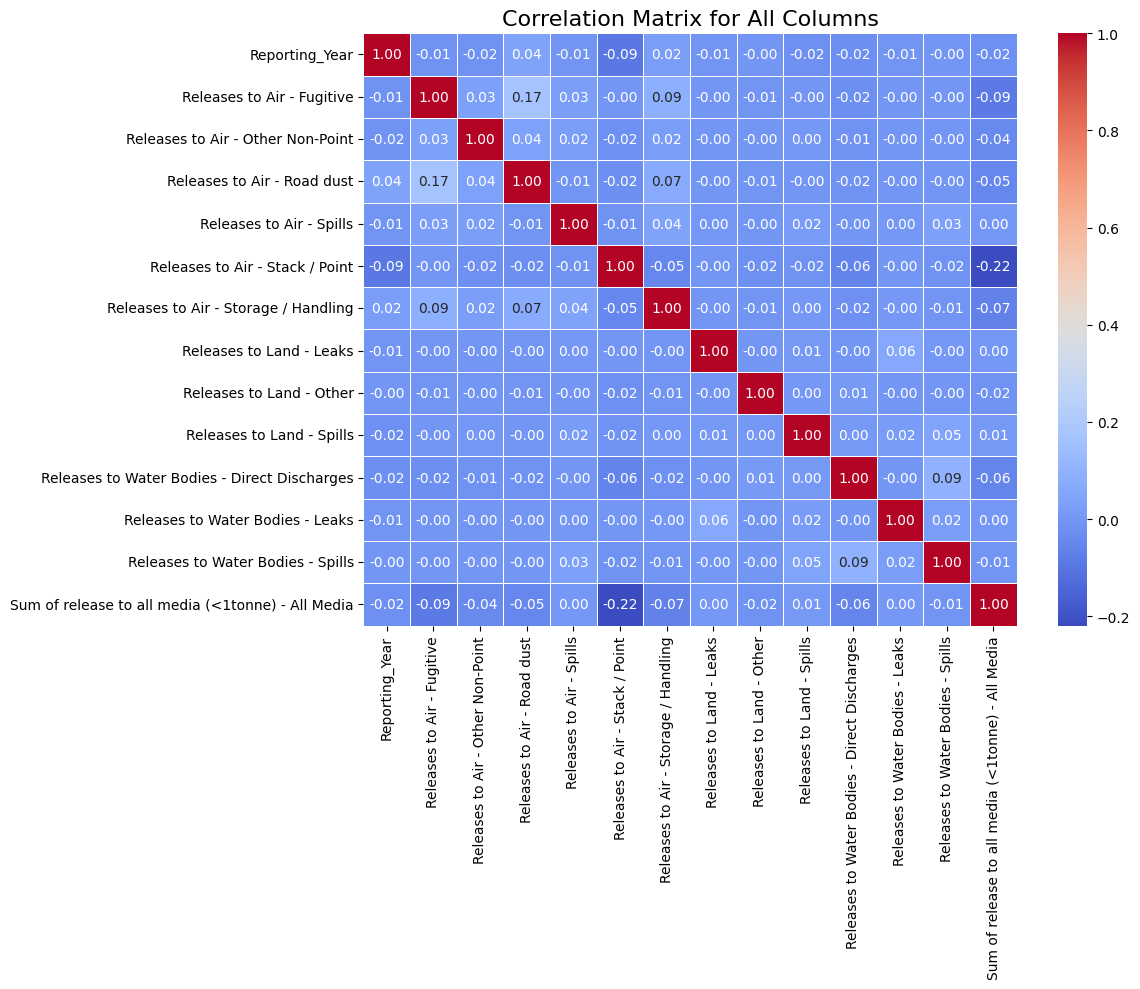

In [ ]:
# Select only numeric columns
numeric_df = df_release_2.select_dtypes(include=[np.number])

numeric_corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Columns', fontsize=16)
plt.tight_layout()
plt.show()

## Standardizing Units

Standardizing units allows for uniform comparisons and accurate calculations, especially for regression models.

### Create kg columns - Standarized Units to Kg

This step is not feature engineering per se, but we need to perform this standardization of units to continue with our project.

To standarize our units which are currently g, kg, tonnes and g teq. We will take g, kg and tonnes which are mass units that can logically be converted into kg. We selected kg because since we have g and tonnes, it is kind of in the middle. g teq is a measurement of toxicity which cannot be converted and standarized to kg, it will be separated for our analysis.

In [ ]:
unit_conversion = {
    'g': 0.001,        # 1 g = 0.001 kg
    'kg': 1,           # already in kg
    'tonnes': 1000     # 1 tonne = 1000 kg
}

def get_conversion_factor(unit):
    unit_lower = unit.lower().strip()
    # If the unit includes 'teq', we treat it as a special case and return None (or handle it differently)
    if 'g teq' in unit_lower:
        return None
    # Otherwise, return the conversion factor from our dictionary
    return unit_conversion.get(unit_lower, None)

# Create the new column with conversion factors
df_release_2['conversion_factor'] = df_release_2['Units'].apply(get_conversion_factor)

In [ ]:
# List of columns to convert
columns_to_convert = [
    'Releases to Air - Fugitive',
    'Releases to Air - Other Non-Point',
    'Releases to Air - Road dust',
    'Releases to Air - Spills',
    'Releases to Air - Stack / Point',
    'Releases to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne) - All Media'
]

# Multiply each column by the 'conversion_factor' and create a new column for the converted values
for col in columns_to_convert:
    new_col_name = col + " (kg)"
    df_release_2[new_col_name] = df_release_2[col] * df_release_2['conversion_factor']

In [ ]:
#Verifying the g teq rows are ignored by the kg conversion

print("g TEQ")
df_release_2.loc[df['Units'] == 'g teq', [
    "Releases to Air - Fugitive (kg)",
    "Releases to Air - Other Non-Point (kg)",
    "Releases to Air - Road dust (kg)",
    "Releases to Air - Spills (kg)",
    "Releases to Air - Stack / Point (kg)",
    "Releases to Air - Storage / Handling (kg)",
    "Releases to Land - Leaks (kg)",
    "Releases to Land - Other (kg)",
    "Releases to Land - Spills (kg)",
    "Releases to Water Bodies - Direct Discharges (kg)",
    "Releases to Water Bodies - Leaks (kg)",
    "Releases to Water Bodies - Spills (kg)",
    'Sum of release to all media (<1tonne) - All Media'
]]

g TEQ


,Releases to Air - Fugitive (kg),Releases to Air - Other Non-Point (kg),Releases to Air - Road dust (kg),Releases to Air - Spills (kg),Releases to Air - Stack / Point (kg),Releases to Air - Storage / Handling (kg),Releases to Land - Leaks (kg),Releases to Land - Other (kg),Releases to Land - Spills (kg),Releases to Water Bodies - Direct Discharges (kg),Releases to Water Bodies - Leaks (kg),Releases to Water Bodies - Spills (kg),Sum of release to all media (<1tonne) - All Media


Handle g TEQ Separately:
The values reported in g TEQ (grams Toxic Equivalents) are already adjusted to reflect the relative toxicity of the substances (typically dioxins and furans). They represent a toxicity‐weighted measure rather than raw mass.

If our analysis focuses on raw mass releases, we should keep g TEQ values aside.

We are separating the df_release in 2 dataframes containing:
-  1.  'g teq' units in a dataframe named df_release_gteq.
-  2.   All the other units that are mass units will be in the dataframe named 'df_release_kg'.

In [ ]:
# DataFrame containing only rows where Units is 'g teq'
df_release_gteq = df_release_2[df_release_2['Units'] == 'g teq']

# DataFrame containing rows where Units are either 'g', 'kg', or 'tonnes'
df_release_kg = df_release_2[df_release_2['Units'].isin(['g', 'kg', 'tonnes'])]


We will now clean both the separated datasets to reflect only relevant columns.

In [ ]:
df_release_gteq = df_release_gteq.copy()

# We will need only the original columns that still have the 'g teq' units. Dropping columns with only kg.
df_release_gteq.drop(columns=[
    "Releases to Air - Fugitive (kg)",
    "Releases to Air - Other Non-Point (kg)",
    "Releases to Air - Road dust (kg)",
    "Releases to Air - Spills (kg)",
    "Releases to Air - Stack / Point (kg)",
    "Releases to Air - Storage / Handling (kg)",
    "Releases to Land - Leaks (kg)",
    "Releases to Land - Other (kg)",
    "Releases to Land - Spills (kg)",
    "Releases to Water Bodies - Direct Discharges (kg)",
    "Releases to Water Bodies - Leaks (kg)",
    "Releases to Water Bodies - Spills (kg)",
    'Sum of release to all media (<1tonne) - All Media','conversion_factor'], inplace=True)



In [ ]:
df_release_kg = df_release_kg.copy()

# We will need only the columns in kg (kilograms) units. Dropping original Units columns
df_release_kg.drop(columns=['Releases to Air - Fugitive', 'Releases to Air - Other Non-Point',
       'Releases to Air - Road dust', 'Releases to Air - Spills',
       'Releases to Air - Stack / Point', 'Releases to Air - Storage / Handling',
       'Releases to Land - Leaks', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne) - All Media', 'Units', 'conversion_factor'], inplace=True)

We will proceed only working with the df_release_kg dataset, since:
- Standardizing units is crucial for accurate comparison between different pollutants
- It ensures consistent scale across all measurements
- It prevents the model from being biased by the magnitude of values in different units
- It's a best practice in data preprocessing for machine learning


In [ ]:
# We will create a new csv containing this new dataframe to only work with kg units

df_release_kg.to_csv('df_release_kg.csv', index=False)

### How The Setup That Will be Developed Aids Our Problem

The overall goal is to predict, based on historical NPRI data, which industry is likely to see the highest growth and which will see the largest decline in releases over the next 5 years. Here's why this approach is well-suited:

#### Feature Engineering
- **Aggregated columns** (Total_All_Releases, Total_Air_Releases, etc.) provide concise, interpretable features.
- This simplifies the modeling process by reducing the number of variables while preserving the essential trends.

#### Temporal Structuring
- Filtering for a recent, fixed period (2017–2022) ensures that the model learns from relevant, up-to-date trends.
- Pivoting by year creates a time-series-like structure that can be used to compute growth rates.

#### Granularity and Flexibility
- By including both the original release types and the aggregated totals, we can later decide which level of detail is most predictive.
- We could build models on overall trends (Total_All_Releases) or investigate which specific media (Air, Land, Water) are driving changes.

#### Data Consistency
- Reshaping the DataFrame and handling missing values ensures that each industry’s time-series is complete.
- A complete time-series is critical for accurately estimating trends and growth rates.

Ultimately, this preparation transforms NPRI data into a structured format that highlights the temporal evolution of pollutant releases. Such a structure is not only easier to visualize (e.g., through trend plots) but also provides a solid foundation for building a machine learning or statistical forecasting model to classify industries by their expected growth or decline in releases over the next 5 years.



## Creating New Features *Author: Michaela G.*

### Creating an Industry Sector Classifier Column

Industry classification allows for better trend analysis and model interpretation.

The NPRI uses the latest (2017) NAICS codes to define industry sectors. From this classification numbers we will classify the NAICS titles we have in our datase.

We used the information in the corresponding website: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1181553 to came up with our new Industry_Sector classification.

The function classify_industry takes a NAICS code as input (which can be numeric or a string) and returns the corresponding industry sector as a string. It checks if the NAICS code starts with one of several predefined prefixes and returns the matching industry sector. A special condition is included for the NAICS code prefix "322" to ensure codes starting with "322230" are skipped.

**Justification**:
- This transformation simplifies the analysis by grouping similar industries together
- It reduces the dimensionality of the data, making the model more generalizable
- It aligns the data with the business problem (industry-level predictions)
- It creates a more balanced dataset by consolidating small, similar categories

In [ ]:
def classify_industry(naics):
    code = str(naics)  # ensure the code is a string
    # Define mapping: each tuple of prefixes maps to an industry sector
    mapping = [
        (("3313",), "Aluminum"),
        (("327",), "Cement, lime and other non-metallic minerals"),
        (("325",), "Chemicals"),
        (("2211",), "Electricity"),
        (("331514", "331511"), "Iron and steel"),
        (("3314", "331529", "331523"), "Metals (except aluminum, and iron and steel)"),
        (("212",), "Mining and quarrying"),
        (("211110", "211113"), "Oil and gas extraction (excluding oil sands)"),
        (("221210", "412", "486"), "Oil and gas pipelines and storage"),
        (("211142", "211141", "211114"), "Oil sands"),
        (("324",), "Petroleum and coal product refining and manufacturing"),
        (("326",), "Plastics and rubber"),
        (("322",), "Pulp and paper"),  # will exclude "322230" below
        (("336", "415190"), "Transportation equipment manufacturing"),
        (("562",), "Waste treatment and disposal"),
        (("221320", "221310"), "Water and wastewater systems"),
        (("321",), "Wood products"),
        (("31", "32", "33"), "Other manufacturing")
    ]

    # Iterate through the mapping to find the first matching industry
    for prefixes, sector in mapping:
        if any(code.startswith(prefix) for prefix in prefixes):
            # For the "322" mapping, ensure we skip codes starting with "322230"
            if prefixes == ("322",) and code.startswith("322230"):
                continue
            return sector
    return "Other (except manufacturing)"

# Apply the classification to the 'NAICS' column of df_release_kg DataFrame
df_release_kg['Industry_Sector'] = df_release_kg['NAICS'].apply(classify_industry)

print("\nNumber of rows per Industry Sector:")
print(df_release_kg['Industry_Sector'].value_counts())



Number of rows per Industry Sector:
Industry_Sector
Oil and gas extraction (excluding oil sands)             251359
Other manufacturing                                       74427
Chemicals                                                 57952
Mining and quarrying                                      49063
Pulp and paper                                            45716
Other (except manufacturing)                              40195
Wood products                                             38837
Petroleum and coal product refining and manufacturing     30703
Oil and gas pipelines and storage                         30386
Electricity                                               29136
Transportation equipment manufacturing                    23519
Cement, lime and other non-metallic minerals              21710
Water and wastewater systems                              21337
Oil sands                                                 16429
Waste treatment and disposal                       

### Creating Year-Based Columns

Year-based columns enables time-series analysis, helping to predict future trends.

We will create temporal features that restructure the data to highlight time-based patterns and aggregate releases by year.

**Justification**:
- Temporal structure is essential for trend prediction (the core problem)
- It transforms the data into a format suitable for time-series analysis
- It allows the model to learn seasonal patterns and long-term trends
- It supports feature creation for growth rate calculation, which is directly related to the prediction target

In [ ]:
# Define the original release columns in your DataFrame
release_cols = [
    'Releases to Air - Fugitive (kg)',
    'Releases to Air - Other Non-Point (kg)',
    'Releases to Air - Road dust (kg)',
    'Releases to Air - Spills (kg)',
    'Releases to Air - Stack / Point (kg)',
    'Releases to Air - Storage / Handling (kg)',
    'Releases to Land - Leaks (kg)',
    'Releases to Land - Other (kg)',
    'Releases to Land - Spills (kg)',
    'Releases to Water Bodies - Direct Discharges (kg)',
    'Releases to Water Bodies - Leaks (kg)',
    'Releases to Water Bodies - Spills (kg)',
    'Sum of release to all media (<1tonne) - All Media (kg)'
]

# Create new aggregate columns on df_release_kg
df_release_kg['Total_Air_Releases (kg)'] = df_release_kg[[col for col in release_cols if 'Air' in col]].sum(axis=1)
df_release_kg['Total_Land_Releases (kg)'] = df_release_kg[[col for col in release_cols if 'Land' in col]].sum(axis=1)
df_release_kg['Total_Water_Releases (kg)'] = df_release_kg[[col for col in release_cols if 'Water' in col]].sum(axis=1)
df_release_kg['Total_All_Releases (kg)'] = df_release_kg[release_cols].sum(axis=1)

# Combine original release columns with the new total columns for pivoting
all_release_cols = release_cols + [
    'Total_Air_Releases (kg)',
    'Total_Land_Releases (kg)',
    'Total_Water_Releases (kg)',
    'Total_All_Releases (kg)'
]

# Filter the DataFrame for the years of interest (2017-2023)
df_filtered = df_release_kg[
    (df_release_kg['Reporting_Year'] >= 2017) &
    (df_release_kg['Reporting_Year'] <= 2023)
].copy()

# Reshape the DataFrame from wide to long format: one row per Industry_Sector, Reporting_Year, and Release_Type
df_melt = pd.melt(
    df_filtered,
    id_vars=['Industry_Sector', 'Reporting_Year'],
    value_vars=all_release_cols,
    var_name='Release_Type',
    value_name='Release_Value'
)

# Pivot the melted DataFrame so that each combination of Industry_Sector and Release_Type gets columns for each year
df_pivot_all = df_melt.pivot_table(
    index=['Industry_Sector', 'Release_Type'],
    columns='Reporting_Year',
    values='Release_Value',
    aggfunc='sum'
).reset_index()

# Remove any pivot table column name and fill missing numeric values with 0
df_pivot_all.columns.name = None
numeric_cols = df_pivot_all.select_dtypes(include=['number']).columns
df_pivot_all[numeric_cols] = df_pivot_all[numeric_cols].fillna(0)

print(df_pivot_all)


    Industry_Sector                                       Release_Type          2017          2018          2019          2020          2021          2022          2023
0          Aluminum                    Releases to Air - Fugitive (kg)  1.160375e+06  1.257857e+06  1.271276e+06  1.272782e+06  1.201601e+06  1.263523e+06  9.718432e+05
1          Aluminum             Releases to Air - Other Non-Point (kg)  4.731890e+04  4.853150e+04  4.844550e+04  4.727750e+04  9.389363e+04  2.770000e-02  1.290000e-01
2          Aluminum                   Releases to Air - Road dust (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
3          Aluminum                      Releases to Air - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.263750e+02  0.000000e+00
4          Aluminum               Releases to Air - Stack / Point (kg)  7.880949e+06  7.808704e+06  7.644041e+06  7.813963e+06  8.025748e+06  7.402822e+06 

In [ ]:
df_pivot_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Industry_Sector  323 non-null    object 
 1   Release_Type     323 non-null    object 
 2   2017             323 non-null    float64
 3   2018             323 non-null    float64
 4   2019             323 non-null    float64
 5   2020             323 non-null    float64
 6   2021             323 non-null    float64
 7   2022             323 non-null    float64
 8   2023             323 non-null    float64
dtypes: float64(7), object(2)
memory usage: 22.8+ KB


In [ ]:
df_pivot_all.head(10)

,Industry_Sector,Release_Type,2017,2018,2019,2020,2021,2022,2023
0,Aluminum,Releases to Air - Fugitive (kg),1.160375e+06,1.257857e+06,1.271276e+06,1.272782e+06,1.201601e+06,1.263523e+06,9.718432e+05
1,Aluminum,Releases to Air - Other Non-Point (kg),4.731890e+04,4.853150e+04,4.844550e+04,4.727750e+04,9.389363e+04,2.770000e-02,1.290000e-01
2,Aluminum,Releases to Air - Road dust (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,Aluminum,Releases to Air - Spills (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.263750e+02,0.000000e+00
4,Aluminum,Releases to Air - Stack / Point (kg),7.880949e+06,7.808704e+06,7.644041e+06,7.813963e+06,8.025748e+06,7.402822e+06,4.549681e+06
5,Aluminum,Releases to Air - Storage / Handling (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.049960e+02,2.195000e+03,2.267031e+04
6,Aluminum,Releases to Land - Leaks (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Aluminum,Releases to Land - Other (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Aluminum,Releases to Land - Spills (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Aluminum,Releases to Water Bodies - Direct Discharges (kg),1.474010e+01,6.326900e+00,5.667000e+00,5.699340e+00,5.488300e+00,4.438102e+00,3.688612e+00


### Additional Feature Engineering

Generating new, meaningful variables can improve model accuracy by providing better insights into patterns and trends.

1. **Calculate proportion features (percentage of releases by medium):**

  - Data Insight: Proportional features capture the distribution of releases across different media (air, water, land), which may be more predictive than absolute values.
  - Normalization Benefit: Converting to proportions reduces the impact of facility size, allowing more meaningful comparison between industries.
  - Domain Relevance: Environmental regulations often target specific release media differently, so proportion changes can signal regulatory compliance or technical changes.
  - Trend Detection: Changes in proportions over time can reveal shifts in industry practices even when total releases remain constant.
2. **Calculate year-over-year growth rates:**
  - Direct Problem Alignment: Growth rates directly address the core question of which industries will experience growth or decline.
  - Scale Independence: Growth rates allow comparison between industries of vastly different sizes.
  - Leading Indicator: Short-term growth patterns often precede longer-term trends.
  - Volatility Capture: Capping extreme values (-10 to 10) prevents outliers from dominating the model while preserving trend direction.
3. **Calculate 5-year average growth rate (CAGR):**
  - Long-term Perspective: Compound annual growth rate smooths out year-to-year fluctuations to reveal underlying trends.
  - Forecasting Foundation: CAGR provides a baseline expectation for future performance based on historical patterns.
  - Statistical Robustness: Using geometric mean growth (CAGR) is mathematically appropriate for time series with compounding effects.
  - Interpretability: CAGR is easily understood by non-technical stakeholders as an annualized growth percentage.
4. **Create volatility feature (standard deviation of yearly changes):**
  - Risk Assessment: Volatility helps identify industries with unstable release patterns that may be harder to predict.
  - Complementary Information: An industry might have low average growth but high volatility, indicating unpredictable behavior.
  - Model Enrichment: Including volatility as a feature allows the model to adjust predictions based on historical stability.
  - Uncertainty Quantification: Provides a measure of confidence in the growth predictions for each industry.



In [ ]:
### Feature Engineering: Additional Features

# 1. Calculate proportion features (percentage of releases by medium)
print("Adding proportional features...")
df_pivot_all['Air_Proportion'] = 0
df_pivot_all['Land_Proportion'] = 0
df_pivot_all['Water_Proportion'] = 0

# Loop through each industry sector
for industry in df_pivot_all['Industry_Sector'].unique():
    # Get rows for 'Total_All_Releases (kg)' for this industry
    total_mask = (df_pivot_all['Industry_Sector'] == industry) & (df_pivot_all['Release_Type'] == 'Total_All_Releases (kg)')
    if not total_mask.any():
        continue

    # Get total releases for this industry by year
    total_releases = df_pivot_all.loc[total_mask, [2017, 2018, 2019, 2020, 2021, 2022,2023]].values.flatten()

    # Calculate proportions for each medium
    for medium in ['Air', 'Land', 'Water']:
        medium_mask = (df_pivot_all['Industry_Sector'] == industry) & (df_pivot_all['Release_Type'] == f'Total_{medium}_Releases (kg)')
        if not medium_mask.any():
            continue

        # Get medium releases for this industry by year
        medium_releases = df_pivot_all.loc[medium_mask, [2017, 2018, 2019, 2020, 2021, 2022, 2023]].values.flatten()

        # Calculate proportion (handle division by zero)
        proportions = np.zeros_like(medium_releases, dtype=float)
        nonzero_mask = total_releases > 0
        if nonzero_mask.any():
            proportions[nonzero_mask] = medium_releases[nonzero_mask] / total_releases[nonzero_mask]

        # Update the proportion column for this industry and medium
        df_pivot_all[f'{medium}_Proportion'] = df_pivot_all[f'{medium}_Proportion'].astype(float)
        df_pivot_all.loc[medium_mask, f'{medium}_Proportion'] = proportions.mean()

# 2. Calculate year-over-year growth rates
print("Calculating year-over-year growth rates...")
year_cols = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

for i in range(1, len(year_cols)):
    prev_year = year_cols[i-1]
    curr_year = year_cols[i]
    growth_col = f'Growth_{prev_year}_to_{curr_year}'

    # Initialize the growth column
    df_pivot_all[growth_col] = 0.0

    # Calculate year-over-year growth rate
    df_pivot_all[growth_col] = ((df_pivot_all[curr_year] - df_pivot_all[prev_year]) /
                              df_pivot_all[prev_year].replace(0, np.nan)).fillna(0)

    # Cap extreme values for better modeling
    df_pivot_all[growth_col] = df_pivot_all[growth_col].clip(-10, 10)

# 3. Calculate 5-year average growth rate (CAGR)
print("Calculating 5-year compound annual growth rate...")
df_pivot_all['CAGR_5yr'] = (((df_pivot_all[2023] / df_pivot_all[2017].replace(0, np.nan)) ** (1/5)) - 1).fillna(0)
df_pivot_all['CAGR_5yr'] = df_pivot_all['CAGR_5yr'].clip(-1, 1)  # Cap between -100% and 100% annual growth

# 4. Create volatility feature (standard deviation of yearly changes)
print("Calculating release volatility...")
growth_cols = [col for col in df_pivot_all.columns if 'Growth_' in str(col)]
df_pivot_all['Growth_Volatility'] = df_pivot_all[growth_cols].std(axis=1)

# Display the enhanced feature set
print("\nFeature engineering complete. New columns added:")
print([col for col in df_pivot_all.columns if col not in ['Industry_Sector', 'Release_Type'] + year_cols])
df_pivot_all.head()

Adding proportional features...
Calculating year-over-year growth rates...
Calculating 5-year compound annual growth rate...
Calculating release volatility...

Feature engineering complete. New columns added:
['Air_Proportion', 'Land_Proportion', 'Water_Proportion', 'Growth_2017_to_2018', 'Growth_2018_to_2019', 'Growth_2019_to_2020', 'Growth_2020_to_2021', 'Growth_2021_to_2022', 'Growth_2022_to_2023', 'CAGR_5yr', 'Growth_Volatility']


,Industry_Sector,Release_Type,2017,2018,2019,2020,2021,2022,2023,Air_Proportion,Land_Proportion,Water_Proportion,Growth_2017_to_2018,Growth_2018_to_2019,Growth_2019_to_2020,Growth_2020_to_2021,Growth_2021_to_2022,Growth_2022_to_2023,CAGR_5yr,Growth_Volatility
0,Aluminum,Releases to Air - Fugitive (kg),1.160375e+06,1.257857e+06,1.271276e+06,1.272782e+06,1.201601e+06,1.263523e+06,9.718432e+05,0.0,0.0,0.0,0.084009,0.010668,0.001185,-0.055926,0.051534,-0.230847,-0.034839,0.112257
1,Aluminum,Releases to Air - Other Non-Point (kg),4.731890e+04,4.853150e+04,4.844550e+04,4.727750e+04,9.389363e+04,2.770000e-02,1.290000e-01,0.0,0.0,0.0,0.025626,-0.001772,-0.024110,0.986011,-1.000000,3.657040,-0.922890,1.620848
2,Aluminum,Releases to Air - Road dust (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Aluminum,Releases to Air - Spills (kg),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.263750e+02,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.408248
4,Aluminum,Releases to Air - Stack / Point (kg),7.880949e+06,7.808704e+06,7.644041e+06,7.813963e+06,8.025748e+06,7.402822e+06,4.549681e+06,0.0,0.0,0.0,-0.009167,-0.021087,0.022229,0.027103,-0.077616,-0.385413,-0.104057,0.157147


## Creating an Industry-Level Aggregated Dataset for Regression

Aggregating data at the industry level reduces noise and allows models to focus on the broader patterns rather than individual company fluctuations.

###Industry Aggregation Justification:

**Problem Scope:** The research question specifically focuses on industry-level trends, not individual facilities.

**Statistical Power:** Aggregating data increases the signal-to-noise ratio by averaging out facility-specific anomalies.

**Dimensionality Reduction:** Reduces the dataset size to focus on the most relevant unit of analysis.

**Pattern Recognition:** Industry-level trends are more stable and reveal systemic changes in environmental impact.

###Facility Count Features Justification:

**Industry Scale Indicator:** Number of facilities provides context for interpreting release volumes.

**Growth Context:** Industries with increasing facility counts but stable releases may indicate improving efficiency.

**Economic Signal:** Changes in facility counts may reflect broader economic trends affecting the industry.

**Regulatory Impact:** Declining facility counts coupled with declining releases may indicate regulatory pressure.

In [ ]:
### Create Industry-Level Aggregated Dataset for Regression

# Create a new DataFrame focusing only on Total_All_Releases for each industry
print("Creating industry-level dataset for regression modeling...")
industry_df = df_pivot_all[df_pivot_all['Release_Type'] == 'Total_All_Releases (kg)'].copy()

# Add features for facility count by industry (using original dataset)
print("Adding facility count features...")
facility_counts = df_filtered.groupby(['Industry_Sector', 'Reporting_Year'])['NPRI_ID'].nunique().reset_index()
facility_counts = facility_counts.pivot(index='Industry_Sector', columns='Reporting_Year', values='NPRI_ID')
facility_counts.columns = [f'Facility_Count_{year}' for year in facility_counts.columns]

# Merge facility counts into industry_df
industry_df = industry_df.merge(facility_counts, left_on='Industry_Sector', right_index=True, how='left')
industry_df[facility_counts.columns] = industry_df[facility_counts.columns].fillna(0)

# Calculate average facilities per industry
industry_df['Avg_Facilities'] = industry_df[[col for col in industry_df.columns if 'Facility_Count_' in str(col)]].mean(axis=1)

# Drop the Release_Type column (no longer needed)
industry_df.drop('Release_Type', axis=1, inplace=True)

print(f"Industry regression dataset created with {len(industry_df)} industries and {len(industry_df.columns)} features")
industry_df.head()

Creating industry-level dataset for regression modeling...
Adding facility count features...
Industry regression dataset created with 19 industries and 27 features


,Industry_Sector,2017,2018,2019,2020,2021,2022,2023,Air_Proportion,Land_Proportion,Water_Proportion,Growth_2017_to_2018,Growth_2018_to_2019,Growth_2019_to_2020,Growth_2020_to_2021,Growth_2021_to_2022,Growth_2022_to_2023,CAGR_5yr,Growth_Volatility,Facility_Count_2017,Facility_Count_2018,Facility_Count_2019,Facility_Count_2020,Facility_Count_2021,Facility_Count_2022,Facility_Count_2023,Avg_Facilities
14,Aluminum,9.107311e+06,9.133223e+06,8.980036e+06,9.149218e+06,9.339064e+06,8.684782e+06,5.546811e+06,0.0,0.0,0.0,0.002845,-0.016772,0.018840,0.020750,-0.070059,-0.361318,-0.094412,0.147716,32,32,33,33,31,29,30,31.428571
31,"Cement, lime and other non-metallic minerals",1.708486e+07,1.764505e+07,1.647595e+07,1.664125e+07,1.666166e+07,1.558284e+07,1.049996e+07,0.0,0.0,0.0,0.032789,-0.066256,0.010033,0.001226,-0.064749,-0.326184,-0.092775,0.132445,161,151,151,141,137,142,160,149.000000
48,Chemicals,2.195516e+07,2.340377e+07,2.241037e+07,2.279025e+07,2.274444e+07,2.270701e+07,1.563650e+07,0.0,0.0,0.0,0.065981,-0.042446,0.016951,-0.002010,-0.001645,-0.311380,-0.065626,0.134792,335,327,323,326,324,325,322,326.000000
65,Electricity,3.179754e+07,3.449372e+07,3.398478e+07,3.224918e+07,3.137860e+07,3.031621e+07,2.069252e+07,0.0,0.0,0.0,0.084792,-0.014755,-0.051070,-0.026996,-0.033857,-0.317444,-0.082335,0.135012,241,256,255,251,225,228,254,244.285714
82,Iron and steel,7.345771e+05,8.812738e+05,7.196447e+05,7.356751e+05,8.900520e+05,7.939764e+05,6.772485e+05,0.0,0.0,0.0,0.199702,-0.183404,0.022275,0.209844,-0.107944,-0.147017,-0.016120,0.173958,27,27,24,25,25,22,21,24.428571


## Feature Encoding

Machine learning models require numerical input, so categorical variables need to be encoded using methods such as one-hot encoding or label encoding.

This explicit encoding section:

- **Apply Label Encoding:** Converts the Industry_Sector categorical variable to a numeric value (0, 1, 2, etc.)
- **Apply One-Hot Encoding:** Creates binary indicator variables for each industry category


These encoding methods are especially important for machine learning algorithms that can't directly process categorical variables (like many of the regression models we're using).

In [ ]:
### Categorical Feature Encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns that need encoding
categorical_cols = ['Industry_Sector']  # Using Industry_Sector to match existing variable

print("\n=== ENCODING CATEGORICAL FEATURES ===")
print(f"Categorical columns to encode: {categorical_cols}")

# Create a copy of the dataset for encoding
encoded_df = industry_df.copy()

# Method 1: Label Encoding for industry sectors
# (useful when categories have some ordinal relationship)
label_encoder = LabelEncoder()
encoded_df['Industry_Sector_Label'] = label_encoder.fit_transform(industry_df['Industry_Sector'])
print(f"Created label encoding for Industry_Sector -> {len(np.unique(encoded_df['Industry_Sector_Label']))} unique labels")

# Method 2: One-Hot Encoding for industry sectors
# (creates binary columns for each category, avoids ordinal relationships)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
industry_onehot = onehot_encoder.fit_transform(industry_df[['Industry_Sector']])
onehot_cols = [f'Industry_{cat}' for cat in onehot_encoder.categories_[0][1:]]
onehot_df = pd.DataFrame(industry_onehot, columns=onehot_cols)

# Combine one-hot encoded columns with the original dataframe
encoded_df = pd.concat([encoded_df, onehot_df], axis=1)

print(f"Created one-hot encoding for Industry_Sector -> {len(onehot_cols)} binary features")

# For time-based features, we could create cyclical encodings
# This is useful for features like months, days of week, etc.
# Since our years are sequential and not cyclical, we'll just document the approach
"""
# Example of cyclical encoding (useful for month, day of week, etc.)
years_cols = [col for col in encoded_df.columns if str(col).isdigit()]
for col in years_cols:
    # If we had month features (1-12), we would add:
    # encoded_df[f'{col}_sin'] = np.sin(2 * np.pi * month / 12)
    # encoded_df[f'{col}_cos'] = np.cos(2 * np.pi * month / 12)
"""

# Update industry_df to include encoded features
industry_df = encoded_df

# Display sample of the encoded features
print("\nSample of encoded features:")
print(industry_df[categorical_cols + ['Industry_Sector_Label'] + onehot_cols[:3]].head())


=== ENCODING CATEGORICAL FEATURES ===
Categorical columns to encode: ['Industry_Sector']
Created label encoding for Industry_Sector -> 19 unique labels
Created one-hot encoding for Industry_Sector -> 18 binary features

Sample of encoded features:
                                 Industry_Sector  Industry_Sector_Label  Industry_Cement, lime and other non-metallic minerals  Industry_Chemicals  Industry_Electricity
14                                      Aluminum                    0.0                                                0.0                     0.0                   0.0
31  Cement, lime and other non-metallic minerals                    1.0                                                NaN                     NaN                   NaN
48                                     Chemicals                    2.0                                                NaN                     NaN                   NaN
65                                   Electricity                    3.0    

## Normalizing Features for Regression Modeling

Normalization ensures that features with different scales do not disproportionately influence the model.

###Standard Scaling Justification:

**Algorithm Requirement:** Many regression algorithms perform better when features are on a similar scale.

**Feature Importance Clarity:** Prevents features with larger magnitudes from dominating the model.

**Statistical Validity:** Transforms features to have zero mean and unit variance, making them comparable.

**Outlier Sensitivity:** Standard scaling preserves the shape of the distribution and relative distances between values.

###Min-Max Scaling Justification:

**Range Consistency:** Ensures all features are scaled to the same range (0-1), preventing any feature from dominating.

**Algorithm Compatibility:** Some algorithms (like neural networks) perform better with feature values in a bounded range.

**Interpretability:** Makes it easier to compare feature values directly.

**Dimensionless Values:** Removes units, allowing for direct comparison of differently measured features.

###Combined Dataset Approach Justification:

**Model Flexibility:** Providing both original and normalized features gives the model more options to find meaningful patterns.

**Interpretability Balance:** Original values maintain interpretability while scaled values improve model performance.

**Transformation Preservation:** Keeping original values allows for easy back-transformation of predictions.

**Feature Selection Option:** Enables later feature selection between original and transformed features based on performance.

In [ ]:
### Normalize Features for Regression Modeling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Convert all column names to strings for compatibility with scikit-learn
industry_df.columns = industry_df.columns.astype(str)

# Identify columns to normalize (numeric columns except categorical features and encodings)
numeric_cols = industry_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude any encoded categorical columns from normalization
cols_to_exclude = ['Industry_Sector_Label']  # Label encoded column
onehot_pattern = 'Industry_'  # Pattern for one-hot encoded columns
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude and not col.startswith(onehot_pattern)]

# Save the industry sector for later reference
industries = industry_df['Industry_Sector'].values

# Create normalized versions of the dataset
print("Creating normalized features for modeling...")

# Standard scaling (zero mean, unit variance)
std_scaler = StandardScaler()
std_scaled_features = std_scaler.fit_transform(industry_df[numeric_cols])
df_std_scaled = pd.DataFrame(std_scaled_features, columns=[f'{col}_std' for col in numeric_cols])
df_std_scaled['Industry_Sector'] = industries

# Min-max scaling (0 to 1 range)
minmax_scaler = MinMaxScaler()
minmax_scaled_features = minmax_scaler.fit_transform(industry_df[numeric_cols])
df_minmax_scaled = pd.DataFrame(minmax_scaled_features, columns=[f'{col}_norm' for col in numeric_cols])
df_minmax_scaled['Industry_Sector'] = industries

# Create a combined dataset with both original and normalized features
df_combined = pd.concat([
    industry_df,
    df_std_scaled.drop('Industry_Sector', axis=1),
    df_minmax_scaled.drop('Industry_Sector', axis=1)
], axis=1)

print(f"Normalized dataset created with {len(df_combined)} rows and {len(df_combined.columns)} columns")
df_combined.head()

Creating normalized features for modeling...
Normalized dataset created with 54 rows and 98 columns


,Industry_Sector,2017,2018,2019,2020,2021,2022,2023,Air_Proportion,Land_Proportion,Water_Proportion,Growth_2017_to_2018,Growth_2018_to_2019,Growth_2019_to_2020,Growth_2020_to_2021,Growth_2021_to_2022,Growth_2022_to_2023,CAGR_5yr,Growth_Volatility,Facility_Count_2017,Facility_Count_2018,Facility_Count_2019,Facility_Count_2020,Facility_Count_2021,Facility_Count_2022,Facility_Count_2023,Avg_Facilities,Industry_Sector_Label,"Industry_Cement, lime and other non-metallic minerals",Industry_Chemicals,Industry_Electricity,Industry_Iron and steel,"Industry_Metals (except aluminum, and iron and steel)",Industry_Mining and quarrying,Industry_Oil and gas extraction (excluding oil sands),Industry_Oil and gas pipelines and storage,Industry_Oil sands,Industry_Other (except manufacturing),Industry_Other manufacturing,Industry_Petroleum and coal product refining and manufacturing,Industry_Plastics and rubber,Industry_Pulp and paper,Industry_Transportation equipment manufacturing,Industry_Waste treatment and disposal,Industry_Water and wastewater systems,Industry_Wood products,2017_std,2018_std,2019_std,2020_std,2021_std,2022_std,2023_std,Air_Proportion_std,Land_Proportion_std,Water_Proportion_std,Growth_2017_to_2018_std,Growth_2018_to_2019_std,Growth_2019_to_2020_std,Growth_2020_to_2021_std,Growth_2021_to_2022_std,Growth_2022_to_2023_std,CAGR_5yr_std,Growth_Volatility_std,Facility_Count_2017_std,Facility_Count_2018_std,Facility_Count_2019_std,Facility_Count_2020_std,Facility_Count_2021_std,Facility_Count_2022_std,Facility_Count_2023_std,Avg_Facilities_std,2017_norm,2018_norm,2019_norm,2020_norm,2021_norm,2022_norm,2023_norm,Air_Proportion_norm,Land_Proportion_norm,Water_Proportion_norm,Growth_2017_to_2018_norm,Growth_2018_to_2019_norm,Growth_2019_to_2020_norm,Growth_2020_to_2021_norm,Growth_2021_to_2022_norm,Growth_2022_to_2023_norm,CAGR_5yr_norm,Growth_Volatility_norm,Facility_Count_2017_norm,Facility_Count_2018_norm,Facility_Count_2019_norm,Facility_Count_2020_norm,Facility_Count_2021_norm,Facility_Count_2022_norm,Facility_Count_2023_norm,Avg_Facilities_norm
14,Aluminum,9.107311e+06,9.133223e+06,8.980036e+06,9.149218e+06,9.339064e+06,8.684782e+06,5.546811e+06,0.0,0.0,0.0,0.002845,-0.016772,0.018840,0.020750,-0.070059,-0.361318,-0.094412,0.147716,32.0,32.0,33.0,33.0,31.0,29.0,30.0,31.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.236456,0.159019,0.172322,0.158931,0.146946,0.098365,-0.01738,0.0,0.0,0.0,-0.311054,-0.032346,-0.149718,-0.890573,-1.086865,-1.560758,-1.748056,0.955367,-0.418739,-0.402177,-0.39956,-0.394013,-0.399406,-0.383473,-0.379817,-0.396099,0.18407,0.155215,0.16195,0.157704,0.158032,0.145679,0.118045,0.0,0.0,0.0,0.379623,0.675935,0.678811,0.024414,0.271652,0.0,0.05682,0.823505,0.025771,0.024116,0.025404,0.023709,0.02228,0.022402,0.020356,0.023323
31,"Cement, lime and other non-metallic minerals",1.708486e+07,1.764505e+07,1.647595e+07,1.664125e+07,1.666166e+07,1.558284e+07,1.049996e+07,0.0,0.0,0.0,0.032789,-0.066256,0.010033,0.001226,-0.064749,-0.326184,-0.092775,0.132445,161.0,151.0,151.0,141.0,137.0,142.0,160.0,149.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Chemicals,2.195516e+07,2.340377e+07,2.241037e+07,2.279025e+07,2.274444e+07,2.270701e+07,1.563650e+07,0.0,0.0,0.0,0.065981,-0.042446,0.016951,-0.002010,-0.001645,-0.311380,-0.065626,0.134792,335.0,327.0,323.0,326.0,324.0,325.0,322.0,326.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Electricity,3.179754e+07,3.449372e+07,3.398478e+07,3.224918e+07,3.

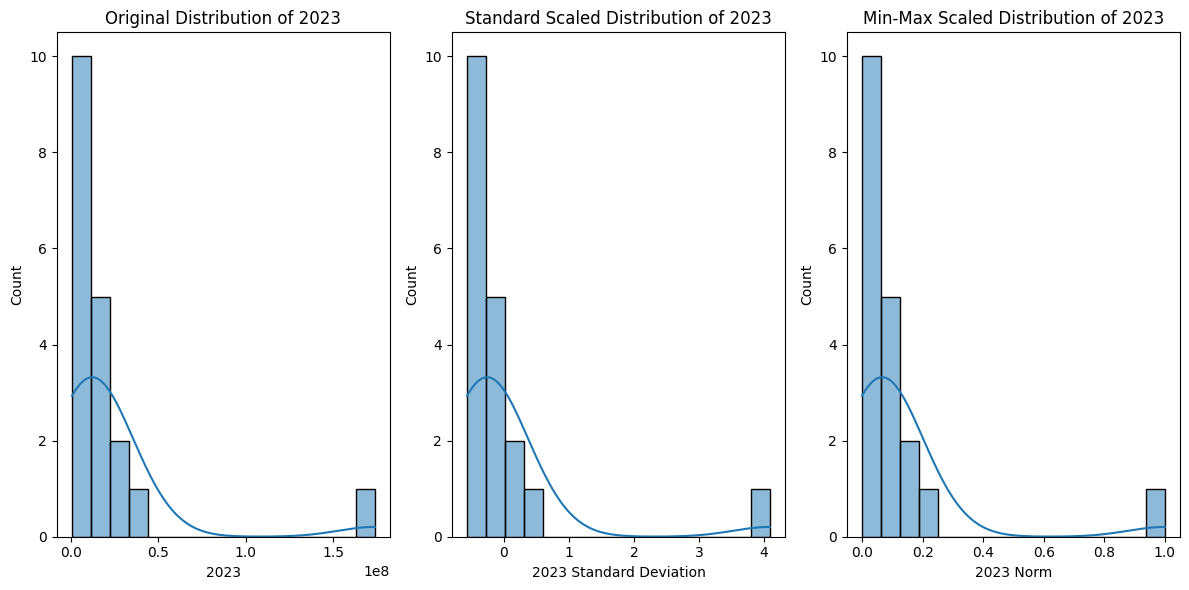

In [ ]:
# Selecting a numeric feature to visualize
feature_to_visualize = '2023'

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Plot the original distribution
plt.subplot(1, 3, 1)
sns.histplot(industry_df[feature_to_visualize], kde=True)
plt.title(f'Original Distribution of {feature_to_visualize}')
plt.xlabel(feature_to_visualize)

# Plot the standard scaled distribution
plt.subplot(1, 3, 2)
sns.histplot(df_combined[f'{feature_to_visualize}_std'], kde=True)
plt.title(f'Standard Scaled Distribution of {feature_to_visualize}')
plt.xlabel(f'{feature_to_visualize} Standard Deviation')

# Plot the min-max scaled distribution
plt.subplot(1, 3, 3)
sns.histplot(df_combined[f'{feature_to_visualize}_norm'], kde=True)
plt.title(f'Min-Max Scaled Distribution of {feature_to_visualize}')
plt.xlabel(f'{feature_to_visualize} Norm')

plt.tight_layout()
plt.show()


The visualization illustrates the effects of two normalization methods on the distribution of a specific feature ('2023' in this case). By comparing the original distribution (first subplot) with the standardized (second subplot) and min-max scaled (third subplot) distributions, the transformations applied by each method can be observed. This comparison provides insight into how normalization techniques alter data distributions, aiding in the selection of an appropriate method for a given dataset and machine learning model.

## Feature Selection

Selecting only the most relevant features reduces computational complexity, as well as improves model interpretability and performance.


Performing simplified feature selection...
Identified 70 candidate features
Using 65 features to predict 2023

Top 10 features for predicting 2023:
  - 2022: 30775.5828
  - 2021: 17819.5223
  - 2020: 13866.8083
  - 2019: 11355.2987
  - 2018: 9014.7103
  - 2017: 6767.5644
  - Facility_Count_2022: 805.0038
  - Facility_Count_2021: 743.5145
  - Facility_Count_2020: 736.6236
  - Avg_Facilities: 731.9762


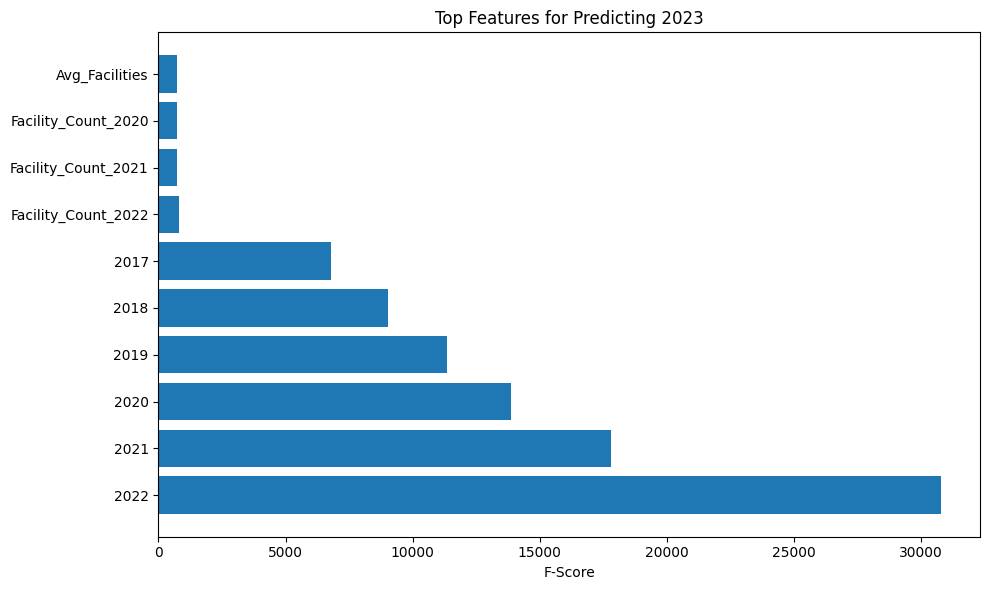


Selected 10 features for forecasting
Selected features: ['2022', '2021', '2020', '2019', '2018', '2017', 'Facility_Count_2022', 'Facility_Count_2021', 'Facility_Count_2020', 'Avg_Facilities']


In [ ]:
### Feature Selection

from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

print("\nPerforming simplified feature selection...")

def simple_feature_selection(df, target_col, feature_cols, n_features_to_select=10):
    """
    Simple feature selection using F-regression.

    Parameters:
    - df: DataFrame containing features and target
    - target_col: Target column name
    - feature_cols: List of feature column names (should NOT include target_col)
    - n_features_to_select: Number of top features to select

    Returns:
    - List of selected feature names
    """
    # Make sure target is not in features
    # Exclude target and any '2023' columns since we are training the model to predict 2023 and we don't want any leakage
    feature_cols = [col for col in feature_cols
                    if col != target_col and '2023' not in col]

    print(f"Using {len(feature_cols)} features to predict {target_col}")

    # Prepare data
    X = df[feature_cols].fillna(0)
    y = df[target_col].fillna(0)

    # Apply SelectKBest with F-regression
    selector = SelectKBest(score_func=f_regression, k=min(n_features_to_select, len(feature_cols)))
    selector.fit(X, y)

    # Get selected feature names and scores
    f_scores = selector.scores_
    feature_scores = {feature: score for feature, score in zip(feature_cols, f_scores)}

    # Sort features by importance score
    top_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)[:n_features_to_select]

    # Print selected features
    print(f"\nTop {len(top_features)} features for predicting {target_col}:")
    for feature, score in top_features:
        print(f"  - {feature}: {score:.4f}")

    # Visualize top features
    plt.figure(figsize=(10, 6))
    features = [item[0] for item in top_features]
    scores = [item[1] for item in top_features]

    plt.barh(range(len(features)), scores, align='center')
    plt.yticks(range(len(features)), [f[:25] + "..." if len(f) > 25 else f for f in features])
    plt.xlabel('F-Score')
    plt.title(f'Top Features for Predicting {target_col}')
    plt.tight_layout()
    plt.show()

    return [feature for feature, _ in top_features]

# Get numeric columns
numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Simple filtering: exclude target year and non-feature columns
target_col = '2023'
excluded_patterns = ['Absolute_Change', 'Growth_2023', '_std', '_scaled', '_encoded', '2024', '2025', '2026', '2027', '2028']
candidate_features = [col for col in numeric_cols
                     if not any(pattern in col for pattern in excluded_patterns)
                     and col != target_col]  # Explicitly exclude target

print(f"Identified {len(candidate_features)} candidate features")

# Perform simple feature selection
selected_features = simple_feature_selection(
    df=df_combined,
    target_col=target_col,
    feature_cols=candidate_features,
    n_features_to_select=10
)

print(f"\nSelected {len(selected_features)} features for forecasting")
print("Selected features:", selected_features)